<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_project/blob/main/2023_%ED%8A%B9%EC%86%A1%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 모델 설치
# !pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.7 MB/s eta 0:00:00


In [ ]:
# 필요 라이브러리 로드

import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
from dateutil import relativedelta

import warnings
warnings.filterwarnings('ignore')

# from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
# path = 'C:/Users/user/Documents/intern_project/jan_project/'                      # 로컬 경로
path = '/content/drive/MyDrive/공항공사_인턴/2023설날예측/2023_특송기간예측/'       # 구글 드라이브 경로

# 로컬
- 원본 데이터
- 주피터 노트북

## 컬럼명 수정

In [ ]:
# 원본 데이터 로드
data = pd.read_csv(path+'항공통계(2010.01-2022.09).csv', encoding='cp949')
data

C:\Users\user\AppData\Local\Temp\ipykernel_6084\1489719366.py:2: DtypeWarning: Columns (8,9,15,16,18,19,21,29,30,33,35,37,38,39,41,49,51,53,58,61,62,64,65,70,92,100,108,116,124,132,140,148,156) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path+'항공통계(2010.01-2022.09).csv', encoding='cp949')


,FID,ARP,ODP,AOD,SDT,STT,FLC,FLO,FLN,FLX,...,PCT,PFT,TPT,CKT,TKT,BKT,MKT,BCT,LDR_ID,LDG_DTM
0,1500004,PUS,BKK,D,20100101,840,TG,THA,651,NaN,...,255,0,0,4883,0,4790,0,NaN,INFA,2022-10-10 06:07:17.0
1,1499099,CJU,KWJ,A,20100101,1205,OZ,AAR,8143,NaN,...,176,3,0,0,0,927,0,NaN,INFA,2022-10-10 06:07:17.0
2,1499098,KWJ,CJU,D,20100101,1120,OZ,AAR,8143,NaN,...,176,3,0,0,0,927,0,NaN,INFA,2022-10-10 06:07:17.0
3,1499467,GMP,CJU,A,20100101,2230,OZ,AAR,8940,NaN,...,119,4,0,0,0,768,0,NaN,INFA,2022-10-10 06:07:17.0
4,1499466,CJU,GMP,D,20100101,2125,OZ,AAR,8940,NaN,...,119,4,0,0,0,768,0,NaN,INFA,2022-10-10 06:07:17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478202,9848884,GMP,CJU,A,20220930,1210,KE,KAL,1224,NaN,...,185,0,0,0,0,885,0,74.0,INFA,2022-10-10 06:18:38.0
5478203,9848882,GMP,CJU,A,20220930,1945,LJ,JNA,318,NaN,...,186,2,0,0,0,841,0,85.0,INFA,2022-10-10 06:18:38.0
5478204,9848879,GMP,CJU,D,20220930,800,LJ,JNA,303,NaN,...,188,3,0,1854,0,571,0,57.0,INFA,2022-10-10 06:18:38.0
5478205,9848875,GMP,RSU,D,20220930,1520,LJ,JNA,381,NaN,...,141,1,0,0,0,306,0,31.0,INFA,2022-10-10 06:18:38.0


In [ ]:
data.columns  # 데이터 컬럼명(영문)

Index(['FID', 'ARP', 'ODP', 'AOD', 'SDT', 'STT', 'FLC', 'FLO', 'FLN', 'FLX',
       ...
       'PCT', 'PFT', 'TPT', 'CKT', 'TKT', 'BKT', 'MKT', 'BCT', 'LDR_ID',
       'LDG_DTM'],
      dtype='object', length=181)

In [ ]:
# 김포공항에 해당되는 데이터만 추출
# df1 = data[data['ARP'] == 'GMP']
# df1

,FID,ARP,ODP,AOD,SDT,STT,FLC,FLO,FLN,FLX,...,PCT,PFT,TPT,CKT,TKT,BKT,MKT,BCT,LDR_ID,LDG_DTM
3,1499467,GMP,CJU,A,20100101,2230,OZ,AAR,8940,NaN,...,119,4,0,0,0,768,0,NaN,INFA,2022-10-10 06:07:17.0
6,1520231,GMP,CJU,D,20100101,700,OZ,AAR,8905,NaN,...,191,1,0,0,0,881,0,NaN,INFA,2022-10-10 06:07:17.0
9,1499266,GMP,PUS,D,20100101,1700,KE,KAL,1121,NaN,...,117,1,0,29,0,267,0,NaN,INFA,2022-10-10 06:07:17.0
12,1499869,GMP,PUS,A,20100101,1125,KE,KAL,1106,NaN,...,83,0,0,28,0,339,0,NaN,INFA,2022-10-10 06:07:17.0
19,1499563,GMP,CJU,A,20100101,2210,LJ,JNA,328,NaN,...,110,1,0,0,0,631,0,NaN,INFA,2022-10-10 06:07:17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478202,9848884,GMP,CJU,A,20220930,1210,KE,KAL,1224,NaN,...,185,0,0,0,0,885,0,74.0,INFA,2022-10-10 06:18:38.0
5478203,9848882,GMP,CJU,A,20220930,1945,LJ,JNA,318,NaN,...,186,2,0,0,0,841,0,85.0,INFA,2022-10-10 06:18:38.0
5478204,9848879,GMP,CJU,D,20220930,800,LJ,JNA,303,NaN,...,188,3,0,1854,0,571,0,57.0,INFA,2022-10-10 06:18:38.0
5478205,9848875,GMP,RSU,D,20220930,1520,LJ,JNA,381,NaN,...,141,1,0,0,0,306,0,31.0,INFA,2022-10-10 06:18:38.0


In [ ]:
# df1.to_csv(path+'김포_2010.01_2022.09.csv', encoding='cp949')

In [ ]:
# 컬럼명을 영문->한글로 변경하기 위함
# 영문명별 한글명이 매칭된 데이터 로드
test = pd.read_excel('C:/Users/user/Documents/intern_project/iFIS 통계마스터(컬럼명세 및 코드명세)_220919.xlsx')
test

,USER_NAME,TABLE_NAME,COLUMN_NAME,COMMENTS,COMMENTS 2 (수정)
0,BDPA,O_IFIS_ST_MASTER,ADT,실제운항일자,실제운항일자
1,BDPA,O_IFIS_ST_MASTER,AOD,도착출발구분자,출발도착구분코드
2,BDPA,O_IFIS_ST_MASTER,ARP,공항코드,IATA공항코드
3,BDPA,O_IFIS_ST_MASTER,ATT,실제운항시간,실제운항시분
4,BDPA,O_IFIS_ST_MASTER,BCT,수화물,총수하물건수
...,...,...,...,...,...
82,BDPA,O_IFIS_ST_MASTER,TRP,통과승객수,통과승객수
83,BDPA,O_IFIS_ST_MASTER,TYA,항공기타입,IATA기종코드
84,BDPA,O_IFIS_ST_MASTER,TYC,항공기타입ICAO코드,ICAO기종코드
85,BDPA,O_IFIS_ST_MASTER,TYS,항공기서브타입,서브유형IATA기종코드


In [ ]:
en_col = test['COLUMN_NAME']          # 영문명
kor_col = test['COMMENTS 2 (수정)']   # 한글명
kor_col

0           실제운항일자
1         출발도착구분코드
2         IATA공항코드
3           실제운항시분
4           총수하물건수
          ...     
82           통과승객수
83        IATA기종코드
84        ICAO기종코드
85    서브유형IATA기종코드
86            시즌ID
Name: COMMENTS 2 (수정), Length: 87, dtype: object

In [ ]:
real_data = data[en_col]    # 원본 데이터의 컬럼을 ABC순으로 정렬
real_data

,ADT,AOD,ARP,ATT,BCT,BKT,CAP,CID,CKT,CNA,...,TKT,TOF,TPT,TRA,TRF,TRP,TYA,TYC,TYS,WID
0,20100101.0,D,PUS,851.0,NaN,4790,260.0,1500004.0,4883,NaN,...,0,I,0,N,0.0,0.0,AB3,A306,AB6,55904.0
1,20100101.0,A,CJU,1214.0,NaN,927,179.0,1499098.0,0,NaN,...,0,D,0,N,0.0,0.0,NaN,A321,321,55523.0
2,20100101.0,D,KWJ,1147.0,NaN,927,179.0,1499099.0,0,NaN,...,0,D,0,N,0.0,0.0,NaN,A321,321,55523.0
3,20100101.0,A,GMP,2230.0,NaN,768,191.0,1499466.0,0,NaN,...,0,D,0,N,0.0,0.0,32S,A321,321,55289.0
4,20100101.0,D,CJU,2136.0,NaN,768,191.0,1499467.0,0,NaN,...,0,D,0,N,0.0,0.0,32S,A321,321,55289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478202,20220930.0,A,GMP,1226.0,74.0,885,188.0,9848883.0,0,NaN,...,0,D,0,N,NaN,0.0,737,B739,739,286918.0
5478203,20220930.0,A,GMP,1951.0,85.0,841,189.0,9848881.0,0,NaN,...,0,D,0,N,NaN,NaN,NaN,B738,73H,286853.0
5478204,20220930.0,D,GMP,830.0,57.0,571,189.0,9848880.0,1854,NaN,...,0,D,0,N,NaN,NaN,NaN,B738,73H,286696.0
5478205,20220930.0,D,GMP,1541.0,31.0,306,189.0,9848876.0,0,NaN,...,0,D,0,N,NaN,NaN,NaN,B738,738,285786.0


In [ ]:
real_data.columns = kor_col     # 컬럼명을 영문->한글로 변경
real_data = real_data.reset_index(drop=True)    # 인덱스 초기화
real_data

COMMENTS 2 (수정),실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,총수하물건수,총수하물중량,좌석수,상대공항ID,총일반화물중량,운항취소원인IATA공항코드,...,총환적화물중량,노선구분코드,총환승승객수,통과운항여부,통과화물중량,통과승객수,IATA기종코드,ICAO기종코드,서브유형IATA기종코드,시즌ID
0,20100101.0,D,PUS,851.0,NaN,4790,260.0,1500004.0,4883,NaN,...,0,I,0,N,0.0,0.0,AB3,A306,AB6,55904.0
1,20100101.0,A,CJU,1214.0,NaN,927,179.0,1499098.0,0,NaN,...,0,D,0,N,0.0,0.0,NaN,A321,321,55523.0
2,20100101.0,D,KWJ,1147.0,NaN,927,179.0,1499099.0,0,NaN,...,0,D,0,N,0.0,0.0,NaN,A321,321,55523.0
3,20100101.0,A,GMP,2230.0,NaN,768,191.0,1499466.0,0,NaN,...,0,D,0,N,0.0,0.0,32S,A321,321,55289.0
4,20100101.0,D,CJU,2136.0,NaN,768,191.0,1499467.0,0,NaN,...,0,D,0,N,0.0,0.0,32S,A321,321,55289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478202,20220930.0,A,GMP,1226.0,74.0,885,188.0,9848883.0,0,NaN,...,0,D,0,N,NaN,0.0,737,B739,739,286918.0
5478203,20220930.0,A,GMP,1951.0,85.0,841,189.0,9848881.0,0,NaN,...,0,D,0,N,NaN,NaN,NaN,B738,73H,286853.0
5478204,20220930.0,D,GMP,830.0,57.0,571,189.0,9848880.0,1854,NaN,...,0,D,0,N,NaN,NaN,NaN,B738,73H,286696.0
5478205,20220930.0,D,GMP,1541.0,31.0,306,189.0,9848876.0,0,NaN,...,0,D,0,N,NaN,NaN,NaN,B738,738,285786.0


In [ ]:
# 한글명 컬럼으로 된 데이터 저장
# real_data.to_csv('C:/Users/user/Documents/intern_project/oct_project/컬럼명정리_2010.01_2022.09.csv')

## 특송기간
- 10년치_특송기간.csv

In [ ]:
# 특송기간 데이터 로드 후 '추석', '설날' 데이터 추출
spec = pd.read_excel(path+'특송일정.xls')
spec = spec[(spec['특별기간코드'] == 'CH') | (spec['특별기간코드'] == 'SL')]
spec = spec.iloc[:, 2:4]
spec

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,특별기간코드,시작일자,종료일자
1,CH,20030909,20030915
3,CH,20040924,20040930
4,SL,20050207,20050211
6,CH,20050916,20050920
7,SL,20060127,20060131
9,CH,20061003,20061008
10,SL,20070216,20070220
12,CH,20070921,20070927
13,SL,20080205,20080211
15,CH,20080912,20080916


In [ ]:
spec = spec.rename(columns={'특별기간코드':'종류'})   # 컬럼명 수정
# 데이터 형변환 int -> datetime
spec['시작일자'] = spec['시작일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
spec['종료일자'] = spec['종료일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
spec

,종류,시작일자,종료일자
1,CH,2003-09-09,2003-09-15
3,CH,2004-09-24,2004-09-30
4,SL,2005-02-07,2005-02-11
6,CH,2005-09-16,2005-09-20
7,SL,2006-01-27,2006-01-31
9,CH,2006-10-03,2006-10-08
10,SL,2007-02-16,2007-02-20
12,CH,2007-09-21,2007-09-27
13,SL,2008-02-05,2008-02-11
15,CH,2008-09-12,2008-09-16


In [ ]:
spec.isnull().sum()  # null값 확인

종류      0
시작일자    0
종료일자    0
dtype: int64

In [ ]:
# 특송기간 날짜 데이터프레임(기준) 생성
total_date = pd.DataFrame(columns=['실제운항일자', 'n번째날', '특송기간'])
total_date

,실제운항일자,n번째날,특송기간


In [ ]:
for i in range(len(spec)):
    holi = spec.iloc[i,0]             # i번째 행 특송기간의 종류
    start = spec.iloc[i,0]            # i번째 행 특송기간의 시작날
    end = spec.iloc[i,1]              # i번째 행 특송기간의 마지막날
    periods = (end-start).days + 1    # i번째 행 특송기간의 길이
    add_date = pd.date_range(start, periods=periods, freq='D')  # i번째 행 특송기간만큼 날짜 생성
    add_df = pd.DataFrame(add_date, columns=['실제운항일자'])   # 데이터프레임으로 변환
    add_df['종류'] = holi
    add_df['n번째날'] = [i for i in range(1, periods+1)]        # 특송기간 중 몇 번째 날인지 'n번째날' 컬럼 생성
    add_df['특송기간'] = periods                                # 특송기간 길이를 의미하는 '특송기간' 컬럼 생성
    total_date = pd.concat([total_date, add_df])                # 해당 데이터프레임을 기준 데이터프레임에 붙이기

In [ ]:
total_date = total_date.reset_index(drop=True)    # 인덱스 초기화
total_date

,실제운항일자,n번째날,특송기간,종류
0,2003-09-09 00:00:00,1,7,CH
1,2003-09-10 00:00:00,2,7,CH
2,2003-09-11 00:00:00,3,7,CH
3,2003-09-12 00:00:00,4,7,CH
4,2003-09-13 00:00:00,5,7,CH
...,...,...,...,...
233,2023-01-20 00:00:00,1,5,SL
234,2023-01-21 00:00:00,2,5,SL
235,2023-01-22 00:00:00,3,5,SL
236,2023-01-23 00:00:00,4,5,SL


In [ ]:
# 특송기간 데이터 저장
# total_date.to_csv(path+'10년치_특송기간.csv', encoding='cp949')

## 전처리
- 날짜추출전_2010_2022.csv

In [ ]:
# 한글명 컬럼으로 된 데이터 로드
data = pd.read_csv(path+'컬럼명정리_2010.01_2022.09.csv', index_col=0)
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_9920\1071133910.py:2: DtypeWarning: Columns (10,12,21,23,24,31,34,36,43,45,48,50,51,56,59,60,70,71,74,77) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path+'컬럼명정리_2010.01_2022.09.csv', index_col=0)


,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,총수하물건수,총수하물중량,좌석수,상대공항ID,총일반화물중량,운항취소원인IATA공항코드,...,총환적화물중량,노선구분코드,총환승승객수,통과운항여부,통과화물중량,통과승객수,IATA기종코드,ICAO기종코드,서브유형IATA기종코드,시즌ID
0,20100101.0,D,PUS,851.0,NaN,4790,260.0,1500004.0,4883,NaN,...,0,I,0,N,0.0,0.0,AB3,A306,AB6,55904.0
1,20100101.0,A,CJU,1214.0,NaN,927,179.0,1499098.0,0,NaN,...,0,D,0,N,0.0,0.0,NaN,A321,321,55523.0
2,20100101.0,D,KWJ,1147.0,NaN,927,179.0,1499099.0,0,NaN,...,0,D,0,N,0.0,0.0,NaN,A321,321,55523.0
3,20100101.0,A,GMP,2230.0,NaN,768,191.0,1499466.0,0,NaN,...,0,D,0,N,0.0,0.0,32S,A321,321,55289.0
4,20100101.0,D,CJU,2136.0,NaN,768,191.0,1499467.0,0,NaN,...,0,D,0,N,0.0,0.0,32S,A321,321,55289.0


In [ ]:
data['실제운항일자'].isnull().sum()  # null값 확인

26864

In [ ]:
data2 = data.dropna(subset=['실제운항일자'])                  # 운항일자 null값 제거
data2['실제운항일자'] = data2['실제운항일자'].astype('int')   # 운항일자 형변환 float -> int
data2.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6516\2125537767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['실제운항일자'] = data2['실제운항일자'].astype('int')


,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,총수하물건수,총수하물중량,좌석수,상대공항ID,총일반화물중량,운항취소원인IATA공항코드,...,총환적화물중량,노선구분코드,총환승승객수,통과운항여부,통과화물중량,통과승객수,IATA기종코드,ICAO기종코드,서브유형IATA기종코드,시즌ID
0,20100101,D,PUS,851.0,NaN,4790,260.0,1500004.0,4883,NaN,...,0,I,0,N,0.0,0.0,AB3,A306,AB6,55904.0
1,20100101,A,CJU,1214.0,NaN,927,179.0,1499098.0,0,NaN,...,0,D,0,N,0.0,0.0,NaN,A321,321,55523.0
2,20100101,D,KWJ,1147.0,NaN,927,179.0,1499099.0,0,NaN,...,0,D,0,N,0.0,0.0,NaN,A321,321,55523.0
3,20100101,A,GMP,2230.0,NaN,768,191.0,1499466.0,0,NaN,...,0,D,0,N,0.0,0.0,32S,A321,321,55289.0
4,20100101,D,CJU,2136.0,NaN,768,191.0,1499467.0,0,NaN,...,0,D,0,N,0.0,0.0,32S,A321,321,55289.0


In [ ]:
# data2['실제운항일자'].value_counts()    # 운항일자 컬럼 확인 -> 2000년대로 기입되지 않은 데이터 존재

0           7368
20190915    1542
20190914    1539
20190807    1533
20190923    1532
            ... 
120928         1
100923         1
100806         1
130728         1
141228         1
Name: 실제운항일자, Length: 4672, dtype: int64

In [ ]:
def del_date(x):
    if x <= 100000:       # '0'으로 기입돼있는 데이터
        x = np.nan        # NaN으로 대체
    elif x <= 1000000:    # ex: '120928'
        x += 20000000     # ex: '20120928'
    else:
        return x          # 그 외에는 그대로 유지
    return x

In [ ]:
data2['실제운항일자'] = data2['실제운항일자'].apply(lambda x: del_date(x))  # 운항일자 데이터 수정
data3 = data2.dropna(subset=['실제운항일자'])                               # NaN값 삭제
data3['실제운항일자'] = data3['실제운항일자'].astype('int')                 # 형변환 str -> int
data3['실제운항일자'] = data3['실제운항일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))  # 형변환 int -> datetime

C:\Users\user\AppData\Local\Temp\ipykernel_6516\788756644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['실제운항일자'] = data2['실제운항일자'].apply(lambda x: del_date(x))
C:\Users\user\AppData\Local\Temp\ipykernel_6516\788756644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['실제운항일자'] = data3['실제운항일자'].astype('int')
C:\Users\user\AppData\Local\Temp\ipykernel_6516\788756644.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [ ]:
data3

,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,총수하물건수,총수하물중량,좌석수,상대공항ID,총일반화물중량,운항취소원인IATA공항코드,...,총환적화물중량,노선구분코드,총환승승객수,통과운항여부,통과화물중량,통과승객수,IATA기종코드,ICAO기종코드,서브유형IATA기종코드,시즌ID
0,2010-01-01,D,PUS,851.0,NaN,4790,260.0,1500004.0,4883,NaN,...,0,I,0,N,0.0,0.0,AB3,A306,AB6,55904.0
1,2010-01-01,A,CJU,1214.0,NaN,927,179.0,1499098.0,0,NaN,...,0,D,0,N,0.0,0.0,NaN,A321,321,55523.0
2,2010-01-01,D,KWJ,1147.0,NaN,927,179.0,1499099.0,0,NaN,...,0,D,0,N,0.0,0.0,NaN,A321,321,55523.0
3,2010-01-01,A,GMP,2230.0,NaN,768,191.0,1499466.0,0,NaN,...,0,D,0,N,0.0,0.0,32S,A321,321,55289.0
4,2010-01-01,D,CJU,2136.0,NaN,768,191.0,1499467.0,0,NaN,...,0,D,0,N,0.0,0.0,32S,A321,321,55289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478202,2022-09-30,A,GMP,1226.0,74.0,885,188.0,9848883.0,0,NaN,...,0,D,0,N,NaN,0.0,737,B739,739,286918.0
5478203,2022-09-30,A,GMP,1951.0,85.0,841,189.0,9848881.0,0,NaN,...,0,D,0,N,NaN,NaN,NaN,B738,73H,286853.0
5478204,2022-09-30,D,GMP,830.0,57.0,571,189.0,9848880.0,1854,NaN,...,0,D,0,N,NaN,NaN,NaN,B738,73H,286696.0
5478205,2022-09-30,D,GMP,1541.0,31.0,306,189.0,9848876.0,0,NaN,...,0,D,0,N,NaN,NaN,NaN,B738,738,285786.0


In [ ]:
data2['실제운항일자'].value_counts()

20190915.0    1542
20190914.0    1539
20190807.0    1533
20190803.0    1532
20190923.0    1532
              ... 
20210107.0     200
20210108.0     180
20120828.0     177
20200902.0      82
20200826.0      56
Name: 실제운항일자, Length: 4656, dtype: int64

In [ ]:
# data3['실제운항일자'].isnull().sum()    # null값 확인

0

In [ ]:
# data3.to_csv(path+'날짜추출전_2010_2022.csv', encoding='cp949')     # 전처리 후 데이터 저장

## 날짜추출
- 특송기간_2010_2022.csv

In [ ]:
# 전처리된 데이터 로드
ex_df = pd.read_csv(path+'날짜추출전_2010_2022.csv', encoding='cp949', index_col=0)
ex_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_12304\913226614.py:1: DtypeWarning: Columns (10,12,21,23,24,31,34,36,43,45,48,50,51,56,59,60,70,71,74,77) have mixed types. Specify dtype option on import or set low_memory=False.
  ex_df = pd.read_csv(path+'날짜추출전_2010_2022.csv', encoding='cp949', index_col=0)


,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,총수하물건수,총수하물중량,좌석수,상대공항ID,총일반화물중량,운항취소원인IATA공항코드,...,총환적화물중량,노선구분코드,총환승승객수,통과운항여부,통과화물중량,통과승객수,IATA기종코드,ICAO기종코드,서브유형IATA기종코드,시즌ID
0,2010-01-01,D,PUS,851.0,NaN,4790,260.0,1500004.0,4883,NaN,...,0,I,0,N,0.0,0.0,AB3,A306,AB6,55904.0
1,2010-01-01,A,CJU,1214.0,NaN,927,179.0,1499098.0,0,NaN,...,0,D,0,N,0.0,0.0,NaN,A321,321,55523.0
2,2010-01-01,D,KWJ,1147.0,NaN,927,179.0,1499099.0,0,NaN,...,0,D,0,N,0.0,0.0,NaN,A321,321,55523.0
3,2010-01-01,A,GMP,2230.0,NaN,768,191.0,1499466.0,0,NaN,...,0,D,0,N,0.0,0.0,32S,A321,321,55289.0
4,2010-01-01,D,CJU,2136.0,NaN,768,191.0,1499467.0,0,NaN,...,0,D,0,N,0.0,0.0,32S,A321,321,55289.0


In [ ]:
total_date = pd.read_csv(path+'10년치_특송기간.csv', encoding='cp949',index_col=0)    # 특송기간 데이터 로드
total_date['실제운항일자'] = total_date['실제운항일자'].apply(lambda x: x[:10])       # 운항일자 초단위 출력 삭제 ex: 2003-09-09 00:00:00 -> 2003-09-09
total_date

,실제운항일자,n번째날,특송기간,종류
0,2003-09-09,1,7,CH
1,2003-09-10,2,7,CH
2,2003-09-11,3,7,CH
3,2003-09-12,4,7,CH
4,2003-09-13,5,7,CH
...,...,...,...,...
233,2023-01-20,1,5,SL
234,2023-01-21,2,5,SL
235,2023-01-22,3,5,SL
236,2023-01-23,4,5,SL


In [ ]:
# 특송기간에 해당되는 데이터만 추출
# 기존 데이터와 특송기간 데이터 join
res_df = pd.merge(ex_df, total_date, left_on='실제운항일자', right_on='실제운항일자', how='inner')    
res_df

,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,총수하물건수,총수하물중량,좌석수,상대공항ID,총일반화물중량,운항취소원인IATA공항코드,...,통과운항여부,통과화물중량,통과승객수,IATA기종코드,ICAO기종코드,서브유형IATA기종코드,시즌ID,n번째날,특송기간,종류
0,2010-02-12,A,TAE,941.0,NaN,1368,149.0,1596355.0,0,NaN,...,N,0.0,0.0,737,B738,738,55619.0,1,5,SL
1,2010-02-12,A,GMP,932.0,NaN,904,189.0,1548909.0,0,NaN,...,N,0.0,0.0,NaN,B738,738,55146.0,1,5,SL
2,2010-02-12,A,TAE,1547.0,NaN,1260,149.0,1548699.0,314,NaN,...,N,0.0,0.0,737,B738,738,55568.0,1,5,SL
3,2010-02-12,D,CJU,1608.0,NaN,1035,188.0,1548692.0,916,NaN,...,N,0.0,0.0,737,B739,739,55562.0,1,5,SL
4,2010-02-12,A,GMP,1749.0,NaN,299,162.0,1548929.0,3615,NaN,...,N,0.0,0.0,737,B734,734,55171.0,1,5,SL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206957,2022-09-12,D,GMP,943.0,26.0,250,189.0,9814483.0,0,NaN,...,N,NaN,NaN,737,B738,738,279095.0,5,5,CH
206958,2022-09-12,A,GMP,1209.0,74.0,776,189.0,9814486.0,0,NaN,...,N,NaN,0.0,737,B738,738,279097.0,5,5,CH
206959,2022-09-12,A,GMP,1907.0,51.0,577,189.0,9814488.0,0,NaN,...,N,NaN,0.0,NaN,B738,738,279098.0,5,5,CH
206960,2022-09-12,D,GMP,1651.0,22.0,251,189.0,9814485.0,0,NaN,...,N,NaN,NaN,NaN,B738,738,279096.0,5,5,CH


In [ ]:
# res_df.to_csv(path+'특송기간_2010_2022.csv', encoding='cp949')    # 날짜추출 데이터 저장

## 변수추출 및 생성
- 전처리완료.csv

In [ ]:
# 특송기간 데이터 로드
df = pd.read_csv(path+'특송기간_2010_2022.csv', encoding='cp949', index_col=0)
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_13748\23477281.py:1: DtypeWarning: Columns (10,12,21,23,24,31,34,36,43,45,48,50,51,59,60,71,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+'특송기간_2010_2022.csv', encoding='cp949', index_col=0)


,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,총수하물건수,총수하물중량,좌석수,상대공항ID,총일반화물중량,운항취소원인IATA공항코드,...,통과운항여부,통과화물중량,통과승객수,IATA기종코드,ICAO기종코드,서브유형IATA기종코드,시즌ID,n번째날,특송기간,종류
0,2010-02-12,A,TAE,941.0,NaN,1368,149.0,1596355.0,0,NaN,...,N,0.0,0.0,737,B738,738,55619.0,1,5,SL
1,2010-02-12,A,GMP,932.0,NaN,904,189.0,1548909.0,0,NaN,...,N,0.0,0.0,NaN,B738,738,55146.0,1,5,SL
2,2010-02-12,A,TAE,1547.0,NaN,1260,149.0,1548699.0,314,NaN,...,N,0.0,0.0,737,B738,738,55568.0,1,5,SL
3,2010-02-12,D,CJU,1608.0,NaN,1035,188.0,1548692.0,916,NaN,...,N,0.0,0.0,737,B739,739,55562.0,1,5,SL
4,2010-02-12,A,GMP,1749.0,NaN,299,162.0,1548929.0,3615,NaN,...,N,0.0,0.0,737,B734,734,55171.0,1,5,SL


In [ ]:
df.info()   # 데이터 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206962 entries, 0 to 206961
Data columns (total 90 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   실제운항일자          206962 non-null  object 
 1   출발도착구분코드        206962 non-null  object 
 2   IATA공항코드        206962 non-null  object 
 3   실제운항시분          206962 non-null  float64
 4   총수하물건수          167319 non-null  float64
 5   총수하물중량          206962 non-null  int64  
 6   좌석수             206962 non-null  float64
 7   상대공항ID          206910 non-null  float64
 8   총일반화물중량         206962 non-null  int64  
 9   운항취소원인IATA공항코드  2 non-null       object 
 10  운항취소여부          40070 non-null   object 
 11  운항취소사유코드        2 non-null       object 
 12  부기장명            0 non-null       float64
 13  기장명             206883 non-null  object 
 14  캐로셀번호           3744 non-null    float64
 15  승무원수            206888 non-null  float64
 16  삭제여부            206962 non-null  object 
 17  회항여부      

In [ ]:
# 필요한 데이터 컬럼 추출 및 파생변수 생성
df2 = df.iloc[:,[0,1,2,3,6,29,54,60,61,78,-3,-2,-1]]
df2["총승객수"] = df2["총유임승객수"] + df2["총무임승객수"]
df2["운항시"] = (df2["실제운항시분"] // 100).astype("str").apply(lambda x : x[:-2] + "시")
df2["주야여부"] = ["주간" if ((df2["실제운항시분"][i] // 100) < 22) & ((df2["실제운항시분"][i] // 100) >6) else '야간' for i in range(df2.shape[0])]   
df2["탑승률"] = round(df2["총승객수"] / df2["좌석수"] * 100,1)

C:\Users\user\AppData\Local\Temp\ipykernel_13748\2855660399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["총승객수"] = df2["총유임승객수"] + df2["총무임승객수"]
C:\Users\user\AppData\Local\Temp\ipykernel_13748\2855660399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["운항시"] = (df2["실제운항시분"] // 100).astype("str").apply(lambda x : x[:-2] + "시")
C:\Users\user\AppData\Local\Temp\ipykernel_13748\2855660399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [ ]:
# 2020년 데이터는 제외(코로나)
df2 = df2[((df2.실제운항일자 >= '2021-01-01')) | ((df2.실제운항일자 <= '2019-12-31') & (df2.실제운항일자 > '2017-01-01'))]
df2

,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,총유임승객수,총무임승객수,노선구분코드,시즌ID,n번째날,특송기간,종류,총승객수,운항시,주야여부,탑승률
95077,2017-01-26,A,KWJ,842.0,189.0,TW,TW902,CJU,175,3,D,123281.0,1,5,SL,178,8시,주간,94.2
95078,2017-01-26,D,KWJ,1530.0,189.0,TW,TW907,CJU,181,4,D,123279.0,1,5,SL,185,15시,주간,97.9
95079,2017-01-26,A,CJU,1556.0,189.0,TW,TW907,KWJ,181,4,D,123279.0,1,5,SL,185,15시,주간,97.9
95080,2017-01-26,D,TAE,2129.0,189.0,7C,7C2985,DAD,186,0,I,123988.0,1,5,SL,186,21시,주간,98.4
95081,2017-01-26,D,CJU,813.0,189.0,TW,TW902,KWJ,175,3,D,123281.0,1,5,SL,178,8시,주간,94.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206957,2022-09-12,D,GMP,943.0,189.0,LJ,LJ437,HIN,77,0,D,279095.0,5,5,CH,77,9시,주간,40.7
206958,2022-09-12,A,GMP,1209.0,189.0,LJ,LJ438,HIN,189,6,D,279097.0,5,5,CH,195,12시,주간,103.2
206959,2022-09-12,A,GMP,1907.0,189.0,LJ,LJ440,HIN,188,3,D,279098.0,5,5,CH,191,19시,주간,101.1
206960,2022-09-12,D,GMP,1651.0,189.0,LJ,LJ439,HIN,83,0,D,279096.0,5,5,CH,83,16시,주간,43.9


In [ ]:
# 노선별 평균 탑승률 도출
ex_rate = pd.DataFrame(df2.groupby(['실제운항일자','운항편명']).mean()['탑승률'])
ex_rate

탑승률
실제운항일자     운항편명        
2010-02-12 7C100   64.0
           7C101   92.6
           7C104   90.5
           7C105  102.2
           7C106   95.8
...                 ...
2022-09-12 VJ991   43.0
           VJ992   99.1
           VJ993   55.9
           VN426   74.3
           VN427   57.2

[121160 rows x 1 columns]

In [ ]:
# # 출발도착, 공항별 집계 후 '평균탑승률' 계산
# res = pd.DataFrame(df2.groupby(['출발도착구분코드', 'IATA공항코드', '상대IATA공항코드']).mean()['탑승률'])
# res.rename(columns={'탑승률':'평균탑승률'}, inplace=True)
# res['평균탑승률'] = res['평균탑승률'].apply(lambda x: round(x,1))   # 소수점 첫째자리까지
# res = res.reset_index()   # 인덱스 초기화
# res

,출발도착구분코드,IATA공항코드,상대IATA공항코드,평균탑승률
0,A,CJJ,BKK,96.8
1,A,CJJ,CJU,84.3
2,A,CJJ,CTS,77.8
3,A,CJJ,DAD,93.2
4,A,CJJ,DLC,23.7
...,...,...,...,...
489,D,YNY,PUS,56.7
490,D,YNY,REP,28.6
491,D,YNY,RSU,76.2
492,D,YNY,TAE,41.8


In [ ]:
# res[(res['IATA공항코드']=='CJJ') & (res['상대IATA공항코드']=='YNJ')]

In [ ]:
# total_df[(total_df['IATA공항코드']=='CJJ') & (total_df['상대IATA공항코드']=='YNJ')]

,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,총유임승객수,총무임승객수,노선구분코드,시즌ID,n번째날,특송기간,특송종류,총승객수,운항시,주야여부,탑승률,평균탑승률
4975,2010-09-18,A,CJJ,1121.0,185.0,CZ,CZ6569,YNJ,95,0,I,NaN,1,9,CH,95,11시,주간,51.4,83.8
5563,2010-09-18,D,CJJ,1256.0,185.0,CZ,CZ6570,YNJ,174,2,I,NaN,1,9,CH,176,12시,주간,95.1,84.2
5680,2010-09-18,A,CJJ,257.0,149.0,ZE,ZE7322,YNJ,69,0,I,NaN,1,9,CH,69,2시,야간,46.3,83.8
5681,2010-09-18,D,CJJ,2137.0,149.0,ZE,ZE7321,YNJ,127,1,I,NaN,1,9,CH,128,21시,주간,85.9,84.2
6061,2010-09-19,A,CJJ,307.0,149.0,ZE,ZE7322,YNJ,72,0,I,NaN,2,9,CH,72,3시,야간,48.3,83.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165094,2020-01-25,D,CJJ,1912.0,160.0,CZ,CZ8332,YNJ,125,0,I,193520.0,3,5,SL,125,19시,주간,78.1,84.2
167451,2020-01-27,D,CJJ,1337.0,189.0,ZE,ZE831,YNJ,113,1,I,193516.0,5,5,SL,114,13시,주간,60.3,84.2
167452,2020-01-27,A,CJJ,1918.0,189.0,ZE,ZE832,YNJ,125,0,I,193534.0,5,5,SL,125,19시,주간,66.1,83.8
167854,2020-01-27,A,CJJ,1749.0,160.0,CZ,CZ8331,YNJ,155,2,I,193532.0,5,5,SL,157,17시,주간,98.1,83.8


In [ ]:
# 기존 데이터에 '평균탑승률' 컬럼 생성
total_df = pd.merge(df2, res, how='left', on=['출발도착구분코드', 'IATA공항코드', '상대IATA공항코드'])
total_df.rename(columns={'종류':'특송종류'}, inplace=True)    # 컬럼명 수정
total_df

,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,총유임승객수,총무임승객수,노선구분코드,시즌ID,n번째날,특송기간,특송종류,총승객수,운항시,주야여부,탑승률,평균탑승률
0,2017-01-26,A,KWJ,842.0,189.0,TW,TW902,CJU,175,3,D,123281.0,1,5,SL,178,8시,주간,94.2,87.9
1,2017-01-26,D,KWJ,1530.0,189.0,TW,TW907,CJU,181,4,D,123279.0,1,5,SL,185,15시,주간,97.9,90.5
2,2017-01-26,A,CJU,1556.0,189.0,TW,TW907,KWJ,181,4,D,123279.0,1,5,SL,185,15시,주간,97.9,90.5
3,2017-01-26,D,TAE,2129.0,189.0,7C,7C2985,DAD,186,0,I,123988.0,1,5,SL,186,21시,주간,98.4,83.7
4,2017-01-26,D,CJU,813.0,189.0,TW,TW902,KWJ,175,3,D,123281.0,1,5,SL,178,8시,주간,94.2,87.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96743,2022-09-12,D,GMP,943.0,189.0,LJ,LJ437,HIN,77,0,D,279095.0,5,5,CH,77,9시,주간,40.7,78.4
96744,2022-09-12,A,GMP,1209.0,189.0,LJ,LJ438,HIN,189,6,D,279097.0,5,5,CH,195,12시,주간,103.2,76.9
96745,2022-09-12,A,GMP,1907.0,189.0,LJ,LJ440,HIN,188,3,D,279098.0,5,5,CH,191,19시,주간,101.1,76.9
96746,2022-09-12,D,GMP,1651.0,189.0,LJ,LJ439,HIN,83,0,D,279096.0,5,5,CH,83,16시,주간,43.9,78.4


In [ ]:
# df2['주야여부'].value_counts()

주간    196578
야간     10384
Name: 주야여부, dtype: int64

In [ ]:
# total_df.to_csv(path+'전처리완료.csv', encoding='cp949')

In [ ]:
# res.to_csv(path+'2010_2022_평균탑승률.csv', encoding='cp949', index=False)

# 추가 전처리
- 파생변수 생성(학습/예측 데이터)
- 요일, 주말, 일자/시간대별 항공편수

## 학습데이터
- 전처리완료2.csv

In [ ]:
## 주말(토,일요일) 여부 확인 함수
def check_day(date_today):
    year = round(date_today / 10000)
    mon = round((date_today % 10000) / 100)
    day = date_today % 100
    
    today_w = datetime(year, mon, day).weekday()  # 일자 입력 -> 요일(숫자) 반환
    return today_w

In [ ]:
t_df = pd.read_csv(path+'전처리완료.csv', encoding='cp949', index_col=0)
t_df.head()

,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,총유임승객수,총무임승객수,노선구분코드,시즌ID,n번째날,특송기간,특송종류,총승객수,운항시,주야여부,탑승률,평균탑승률
0,2017-01-26,A,KWJ,842.0,189.0,TW,TW902,CJU,175,3,D,123281.0,1,5,SL,178,8시,주간,94.2,87.9
1,2017-01-26,D,KWJ,1530.0,189.0,TW,TW907,CJU,181,4,D,123279.0,1,5,SL,185,15시,주간,97.9,90.5
2,2017-01-26,A,CJU,1556.0,189.0,TW,TW907,KWJ,181,4,D,123279.0,1,5,SL,185,15시,주간,97.9,90.5
3,2017-01-26,D,TAE,2129.0,189.0,7C,7C2985,DAD,186,0,I,123988.0,1,5,SL,186,21시,주간,98.4,83.7
4,2017-01-26,D,CJU,813.0,189.0,TW,TW902,KWJ,175,3,D,123281.0,1,5,SL,178,8시,주간,94.2,87.9


In [ ]:
# 데이터 형변환
t_df['실제운항일자'] = pd.to_datetime(t_df['실제운항일자'])
t_df2 = t_df['실제운항일자'].apply(lambda x: x.strftime('%Y%m%d'))
t_df2 = pd.DataFrame(t_df2.astype("int"))

# 날짜별 요일 추출
t_df2["weekday"] = t_df2["실제운항일자"].apply(lambda x: check_day(x))
t_df2.head()

,실제운항일자,weekday
0,20170126,3
1,20170126,3
2,20170126,3
3,20170126,3
4,20170126,3


In [ ]:
# 요일별 인코딩
day_t_df = pd.get_dummies(t_df2['weekday'])
day_t_df.columns = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
tot_t_df = pd.concat([t_df2, day_t_df], axis=1)
tot_t_df['주말'] = day_t_df[['토요일', '일요일']].sum(axis=1)  # 토요일 or 일요일 -> '주말': 1

In [ ]:
# 필요 컬럼 추출
train_data_weekday = tot_t_df[["실제운항일자","weekday","주말"]]
train_data_weekday

,실제운항일자,weekday,주말
0,20170126,3,0
1,20170126,3,0
2,20170126,3,0
3,20170126,3,0
4,20170126,3,0
...,...,...,...
96743,20220912,0,0
96744,20220912,0,0
96745,20220912,0,0
96746,20220912,0,0


In [ ]:
# 기존 데이터에 '요일', '주말' 컬럼 생성
t_df["요일"] = train_data_weekday["weekday"]
t_df["주말"] = train_data_weekday["주말"]
t_df.head()

,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,총유임승객수,총무임승객수,...,n번째날,특송기간,특송종류,총승객수,운항시,주야여부,탑승률,평균탑승률,요일,주말
0,2017-01-26,A,KWJ,842.0,189.0,TW,TW902,CJU,175,3,...,1,5,SL,178,8시,주간,94.2,87.9,3,0
1,2017-01-26,D,KWJ,1530.0,189.0,TW,TW907,CJU,181,4,...,1,5,SL,185,15시,주간,97.9,90.5,3,0
2,2017-01-26,A,CJU,1556.0,189.0,TW,TW907,KWJ,181,4,...,1,5,SL,185,15시,주간,97.9,90.5,3,0
3,2017-01-26,D,TAE,2129.0,189.0,7C,7C2985,DAD,186,0,...,1,5,SL,186,21시,주간,98.4,83.7,3,0
4,2017-01-26,D,CJU,813.0,189.0,TW,TW902,KWJ,175,3,...,1,5,SL,178,8시,주간,94.2,87.9,3,0


In [ ]:
# t_df.to_csv(path + "전처리완료2.csv", encoding = "cp949")

In [ ]:
t_df.columns

Index(['실제운항일자', '출발도착구분코드', 'IATA공항코드', '실제운항시분', '좌석수', 'IATA항공사코드', '운항편명',
       '상대IATA공항코드', '총유임승객수', '총무임승객수', '노선구분코드', '시즌ID', 'n번째날', '특송기간',
       '특송종류', '총승객수', '운항시', '주야여부', '탑승률', '평균탑승률', '요일', '주말'],
      dtype='object')

In [ ]:
# # 노선별 집계 - 시간대별/일자별
# t_count_hour = t_df.groupby(["실제운항일자","출발도착구분코드","IATA공항코드","상대IATA공항코드","운항시"]).size().reset_index().rename(columns = {0:"노선_시간별운항횟수"})
# t_count_day = t_df.groupby(["실제운항일자","출발도착구분코드","IATA공항코드","상대IATA공항코드"]).size().reset_index().rename(columns = {0:"노선_일별운항횟수"})

In [ ]:
# display(t_count_hour, t_count_day)

,실제운항일자,출발도착구분코드,IATA공항코드,상대IATA공항코드,운항시,노선_시간별운항횟수
0,2017-01-26,A,CJJ,CJU,10시,2
1,2017-01-26,A,CJJ,CJU,11시,1
2,2017-01-26,A,CJJ,CJU,13시,2
3,2017-01-26,A,CJJ,CJU,14시,1
4,2017-01-26,A,CJJ,CJU,16시,2
...,...,...,...,...,...,...
44265,2022-09-12,D,YNY,CRK,21시,1
44266,2022-09-12,D,YNY,GMP,18시,1
44267,2022-09-12,D,YNY,GMP,8시,1
44268,2022-09-12,D,YNY,KWJ,10시,1


,실제운항일자,출발도착구분코드,IATA공항코드,상대IATA공항코드,노선_일별운항횟수
0,2017-01-26,A,CJJ,CJU,16
1,2017-01-26,A,CJJ,HRB,1
2,2017-01-26,A,CJJ,SHE,1
3,2017-01-26,A,CJJ,TPE,3
4,2017-01-26,A,CJU,CGO,1
...,...,...,...,...,...
11965,2022-09-12,D,YNY,CJU,3
11966,2022-09-12,D,YNY,CRK,1
11967,2022-09-12,D,YNY,GMP,2
11968,2022-09-12,D,YNY,KWJ,1


In [ ]:
# # 기존 데이터와 병합
# t_df2 = pd.merge(t_df, t_count_hour, how='left', on= ["실제운항일자","출발도착구분코드","IATA공항코드","상대IATA공항코드","운항시"])
# t_df2 = pd.merge(t_df2, t_count_day, how='left', on= ["실제운항일자","출발도착구분코드","IATA공항코드","상대IATA공항코드"])

In [ ]:
t_df2

,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,총유임승객수,총무임승객수,...,특송종류,총승객수,운항시,주야여부,탑승률,평균탑승률,요일,주말,노선_시간별운항횟수,노선_일별운항횟수
0,2017-01-26,A,KWJ,842.0,189.0,TW,TW902,CJU,175,3,...,SL,178,8시,주간,94.2,87.9,3,0,1,12
1,2017-01-26,D,KWJ,1530.0,189.0,TW,TW907,CJU,181,4,...,SL,185,15시,주간,97.9,90.5,3,0,2,12
2,2017-01-26,A,CJU,1556.0,189.0,TW,TW907,KWJ,181,4,...,SL,185,15시,주간,97.9,90.5,3,0,1,12
3,2017-01-26,D,TAE,2129.0,189.0,7C,7C2985,DAD,186,0,...,SL,186,21시,주간,98.4,83.7,3,0,1,1
4,2017-01-26,D,CJU,813.0,189.0,TW,TW902,KWJ,175,3,...,SL,178,8시,주간,94.2,87.9,3,0,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96743,2022-09-12,D,GMP,943.0,189.0,LJ,LJ437,HIN,77,0,...,CH,77,9시,주간,40.7,78.4,0,0,1,3
96744,2022-09-12,A,GMP,1209.0,189.0,LJ,LJ438,HIN,189,6,...,CH,195,12시,주간,103.2,76.9,0,0,1,3
96745,2022-09-12,A,GMP,1907.0,189.0,LJ,LJ440,HIN,188,3,...,CH,191,19시,주간,101.1,76.9,0,0,1,3
96746,2022-09-12,D,GMP,1651.0,189.0,LJ,LJ439,HIN,83,0,...,CH,83,16시,주간,43.9,78.4,0,0,2,3


In [ ]:
# # 전처리 완료 후 데이터 저장
# t_df2.to_csv(path + "전처리완료2.csv", encoding = "cp949")

## 예측데이터
- 2023_특송(일자포함)2.csv

In [ ]:
# 출도착, 공항별 평균탑승률 데이터 로드
res = pd.read_csv(path+'2010_2022_평균탑승률.csv', encoding='cp949')
res

,출발도착구분코드,IATA공항코드,상대IATA공항코드,평균탑승률
0,A,CJJ,BKK,69.5
1,A,CJJ,CAN,98.7
2,A,CJJ,CEB,94.3
3,A,CJJ,CGO,98.8
4,A,CJJ,CGQ,92.8
...,...,...,...,...
742,D,YNY,TYN,78.7
743,D,YNY,VVO,91.8
744,D,YNY,WUH,97.9
745,D,YNY,XMN,45.5


In [ ]:
# 예측데이터 로드(2023 설연휴)
test = pd.read_excel(path+'(230112기준)특송스케줄(230120-230124).xls', header=1)
test

,예정운항일자,운항편,공항,상대공항,국내D 국제I,출발D 도착A,항공사코드,기종,부정기여부,임시증편여부,예정운항시분,기준탑승률,공급석,예상승객수
0,20230120,LJ038,PUS,CEB,I,A,LJ,738A,N,N,45,88.4,189,178
1,20230121,LJ038,PUS,CEB,I,A,LJ,738A,N,N,45,88.4,189,167
2,20230122,LJ038,PUS,CEB,I,A,LJ,738A,N,N,45,88.4,189,170
3,20230123,LJ038,PUS,CEB,I,A,LJ,738A,N,N,45,88.4,189,185
4,20230124,LJ038,PUS,CEB,I,A,LJ,738A,N,N,45,88.4,189,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6608,20230120,LJLJ582,CJJ,CJU,D,A,LJ,B739,N,N,2320,77.4,188,156
6609,20230121,LJLJ582,CJJ,CJU,D,A,LJ,B739,N,N,2320,77.4,188,145
6610,20230122,LJLJ582,CJJ,CJU,D,A,LJ,B739,N,N,2320,77.4,188,149
6611,20230123,LJLJ582,CJJ,CJU,D,A,LJ,B739,N,N,2320,77.4,188,172


In [ ]:
test_df = test.iloc[:, [0,1,2,3,4,5,6,10,11,12]]    # 필요 컬럼 추출
test_df.head()

,예정운항일자,운항편,공항,상대공항,국내D 국제I,출발D 도착A,항공사코드,예정운항시분,기준탑승률,공급석
0,20230120,LJ038,PUS,CEB,I,A,LJ,45,88.4,189
1,20230121,LJ038,PUS,CEB,I,A,LJ,45,88.4,189
2,20230122,LJ038,PUS,CEB,I,A,LJ,45,88.4,189
3,20230123,LJ038,PUS,CEB,I,A,LJ,45,88.4,189
4,20230124,LJ038,PUS,CEB,I,A,LJ,45,88.4,189


In [ ]:
# 학습 데이터와 맞게 틀 맞추기
# 운항시, 주야여부, 특송기간, n번째날 변수 생성 및 정리

test_df['특송종류'] = 'SL'
test_df['예정운항시분'] = (test_df['예정운항시분']//100).astype('str')
test_df['예정운항시분'] = test_df['예정운항시분'].apply(lambda x : x + '시')
test_df['예정운항일자'] = test_df['예정운항일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

# 컬럼명 수정
test_df.rename(columns={'예정운항일자':'실제운항일자',
                        '국내D 국제I':'노선구분코드',
                        '출발D 도착A':'출발도착구분코드',
                        '예정운항시분':'운항시',
                        '항공사코드':'IATA항공사코드',
                       '공항':'IATA공항코드',
                        '공급석':'좌석수',
                       '상대공항':'상대IATA공항코드',
                       '운항편':'운항편명'}, inplace=True)
test_df['주야여부'] = test_df['운항시'].apply(lambda x: '주간' if ((int(x[:-1]) < 22) & (int(x[:-1]) > 6)) else '야간')

start = pd.Timestamp(2023, 1, 20)
end = pd.Timestamp(2023, 1, 24)
periods = (end-start).days + 1
test_df['특송기간'] = periods
test_df['n번째날'] = test_df['실제운항일자'].apply(lambda x: (x-start).days + 1)
test_df = test_df.drop(['기준탑승률'], axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_13748\3498914299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['특송종류'] = 'SL'
C:\Users\user\AppData\Local\Temp\ipykernel_13748\3498914299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['예정운항시분'] = (test_df['예정운항시분']//100).astype('str')
C:\Users\user\AppData\Local\Temp\ipykernel_13748\3498914299.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [ ]:
test_df.head()

,실제운항일자,운항편명,IATA공항코드,상대IATA공항코드,노선구분코드,출발도착구분코드,IATA항공사코드,운항시,좌석수,특송종류,주야여부,특송기간,n번째날
0,2023-01-20,LJ038,PUS,CEB,I,A,LJ,0시,189,SL,야간,5,1
1,2023-01-21,LJ038,PUS,CEB,I,A,LJ,0시,189,SL,야간,5,2
2,2023-01-22,LJ038,PUS,CEB,I,A,LJ,0시,189,SL,야간,5,3
3,2023-01-23,LJ038,PUS,CEB,I,A,LJ,0시,189,SL,야간,5,4
4,2023-01-24,LJ038,PUS,CEB,I,A,LJ,0시,189,SL,야간,5,5


In [ ]:
# '평균탑승률' 추가
total = pd.merge(test_df, res, how='left', on=['출발도착구분코드', 'IATA공항코드', '상대IATA공항코드'])
total

,실제운항일자,운항편명,IATA공항코드,상대IATA공항코드,노선구분코드,출발도착구분코드,IATA항공사코드,운항시,좌석수,특송종류,주야여부,특송기간,n번째날,평균탑승률
0,2023-01-20,LJ038,PUS,CEB,I,A,LJ,0시,189,SL,야간,5,1,78.7
1,2023-01-21,LJ038,PUS,CEB,I,A,LJ,0시,189,SL,야간,5,2,78.7
2,2023-01-22,LJ038,PUS,CEB,I,A,LJ,0시,189,SL,야간,5,3,78.7
3,2023-01-23,LJ038,PUS,CEB,I,A,LJ,0시,189,SL,야간,5,4,78.7
4,2023-01-24,LJ038,PUS,CEB,I,A,LJ,0시,189,SL,야간,5,5,78.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6608,2023-01-20,LJLJ582,CJJ,CJU,D,A,LJ,23시,188,SL,야간,5,1,82.6
6609,2023-01-21,LJLJ582,CJJ,CJU,D,A,LJ,23시,188,SL,야간,5,2,82.6
6610,2023-01-22,LJLJ582,CJJ,CJU,D,A,LJ,23시,188,SL,야간,5,3,82.6
6611,2023-01-23,LJLJ582,CJJ,CJU,D,A,LJ,23시,188,SL,야간,5,4,82.6


In [ ]:
# res[(res['IATA공항코드']=='YNY') & (res['상대IATA공항코드']=='TPE')]

,출발도착구분코드,IATA공항코드,상대IATA공항코드,평균탑승률
369,A,YNY,TPE,58.5
740,D,YNY,TPE,40.7


In [ ]:
# total[(total['IATA공항코드']=='YNY') & (total['상대IATA공항코드']=='TPE')]

,예정운항일자,운항편,IATA공항코드,상대IATA공항코드,노선구분코드,출발도착구분코드,IATA항공사코드,운항시,좌석수,특송종류,주야여부,특송기간,n번째날,평균탑승률
311,2023-01-20,4V4V201,YNY,TPE,I,D,4V,8시,189,SL,주간,5,1,40.7
313,2023-01-21,4V4V201,YNY,TPE,I,D,4V,8시,189,SL,주간,5,2,40.7
315,2023-01-22,4V4V201,YNY,TPE,I,D,4V,8시,189,SL,주간,5,3,40.7
317,2023-01-23,4V4V201,YNY,TPE,I,D,4V,8시,189,SL,주간,5,4,40.7
319,2023-01-24,4V4V201,YNY,TPE,I,D,4V,8시,189,SL,주간,5,5,40.7
1441,2023-01-20,4V4V202,YNY,TPE,I,A,4V,15시,189,SL,주간,5,1,58.5
1442,2023-01-21,4V4V202,YNY,TPE,I,A,4V,15시,189,SL,주간,5,2,58.5
1443,2023-01-22,4V4V202,YNY,TPE,I,A,4V,15시,189,SL,주간,5,3,58.5
1444,2023-01-23,4V4V202,YNY,TPE,I,A,4V,15시,189,SL,주간,5,4,58.5
1445,2023-01-24,4V4V202,YNY,TPE,I,A,4V,15시,189,SL,주간,5,5,58.5


In [ ]:
# 컬럼 순서 정렬
total = total.loc[:, ['실제운항일자', '출발도착구분코드', 'IATA공항코드', '좌석수', 'IATA항공사코드','운항편명',
                      '상대IATA공항코드','노선구분코드','n번째날','특송기간','특송종류','운항시','주야여부','평균탑승률']]
total.head()

,실제운항일자,출발도착구분코드,IATA공항코드,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,노선구분코드,n번째날,특송기간,특송종류,운항시,주야여부,평균탑승률
0,2023-01-20,A,PUS,189,LJ,LJ038,CEB,I,1,5,SL,0시,야간,78.7
1,2023-01-21,A,PUS,189,LJ,LJ038,CEB,I,2,5,SL,0시,야간,78.7
2,2023-01-22,A,PUS,189,LJ,LJ038,CEB,I,3,5,SL,0시,야간,78.7
3,2023-01-23,A,PUS,189,LJ,LJ038,CEB,I,4,5,SL,0시,야간,78.7
4,2023-01-24,A,PUS,189,LJ,LJ038,CEB,I,5,5,SL,0시,야간,78.7


In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6613 entries, 0 to 6612
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   실제운항일자      6613 non-null   datetime64[ns]
 1   출발도착구분코드    6613 non-null   object        
 2   IATA공항코드    6613 non-null   object        
 3   좌석수         6613 non-null   int64         
 4   IATA항공사코드   6613 non-null   object        
 5   운항편명        6613 non-null   object        
 6   상대IATA공항코드  6613 non-null   object        
 7   노선구분코드      6613 non-null   object        
 8   n번째날        6613 non-null   int64         
 9   특송기간        6613 non-null   int64         
 10  특송종류        6613 non-null   object        
 11  운항시         6613 non-null   object        
 12  주야여부        6613 non-null   object        
 13  평균탑승률       6599 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 775.0+ KB


In [ ]:
# 예측 데이터 저장
# total.to_csv(path+'2023_특송(일자포함).csv', encoding='cp949')

In [ ]:
## 요일, 주말, 일자/시간대별 항공편수 파생변수 생성
# 요일, 주말
p_df = pd.read_csv(path+'2023_특송(일자포함).csv', encoding='cp949', index_col=0)
p_df['실제운항일자'] = pd.to_datetime(p_df['실제운항일자'])
p_df2 = p_df['실제운항일자'].apply(lambda x: x.strftime('%Y%m%d'))
p_df2 = pd.DataFrame(p_df2.astype("int"))
p_df2["weekday"] = p_df2["실제운항일자"].apply(lambda x: check_day(x))  # 날짜에서 요일 추출

day_p_df = pd.get_dummies(p_df2['weekday'])                             # 요일 기준 원핫 인코딩 데이터프레임 생성
day_p_df.columns = ['월요일', '화요일', '금요일', '토요일', '일요일']
tot_p_df = pd.concat([p_df2, day_p_df], axis=1)                         # 기존 데이터와 병합
tot_p_df['주말'] = day_p_df[['토요일', '일요일']].sum(axis=1)           # 토요일 or 일요일 -> '주말': 1

pred_data_weekday = tot_p_df[["실제운항일자","weekday","주말"]]         # 필요 컬럼 추출

# 기존 데이터에 '요일', '주말' 컬럼 생성
p_df["요일"] = pred_data_weekday["weekday"]
p_df["주말"] = pred_data_weekday["주말"]
p_df.to_csv(path + "2023_특송(일자포함)2.csv", encoding = "cp949")      # 데이터 저장

# 일자/시간대별 항공편수 집계
p_count_hour = p_df.groupby(["실제운항일자","출발도착구분코드","IATA공항코드","상대IATA공항코드","운항시"]).size().reset_index().rename(columns = {0:"노선_시간별운항횟수"})
p_count_day = p_df.groupby(["실제운항일자","출발도착구분코드","IATA공항코드","상대IATA공항코드"]).size().reset_index().rename(columns = {0:"노선_일별운항횟수"})

# 기존 데이터와 병합
p_df2 = pd.merge(p_df, p_count_hour, how='left', on= ["실제운항일자","출발도착구분코드","IATA공항코드","상대IATA공항코드","운항시"])
p_df2 = pd.merge(p_df2, p_count_day, how='left', on= ["실제운항일자","출발도착구분코드","IATA공항코드","상대IATA공항코드"])
p_df2

,실제운항일자,출발도착구분코드,IATA공항코드,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,노선구분코드,n번째날,특송기간,특송종류,운항시,주야여부,평균탑승률,요일,주말,노선_시간별운항횟수,노선_일별운항횟수
0,2023-01-20,A,PUS,189,LJ,LJ038,CEB,I,1,5,SL,0시,야간,78.7,4,0,1,2
1,2023-01-21,A,PUS,189,LJ,LJ038,CEB,I,2,5,SL,0시,야간,78.7,5,1,1,2
2,2023-01-22,A,PUS,189,LJ,LJ038,CEB,I,3,5,SL,0시,야간,78.7,6,1,1,2
3,2023-01-23,A,PUS,189,LJ,LJ038,CEB,I,4,5,SL,0시,야간,78.7,0,0,1,2
4,2023-01-24,A,PUS,189,LJ,LJ038,CEB,I,5,5,SL,0시,야간,78.7,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6608,2023-01-20,A,CJJ,188,LJ,LJLJ582,CJU,D,1,5,SL,23시,야간,82.6,4,0,2,22
6609,2023-01-21,A,CJJ,188,LJ,LJLJ582,CJU,D,2,5,SL,23시,야간,82.6,5,1,1,21
6610,2023-01-22,A,CJJ,188,LJ,LJLJ582,CJU,D,3,5,SL,23시,야간,82.6,6,1,1,21
6611,2023-01-23,A,CJJ,188,LJ,LJLJ582,CJU,D,4,5,SL,23시,야간,82.6,0,0,2,22


In [ ]:
# 데이터 저장
# p_df2.to_csv(path + "2023_특송(일자포함)2.csv", encoding = "cp949")

# 예측 모델링
- 전처리 후 데이터
- 구글 드라이브

In [ ]:
# 전처리 완료된 학습용 데이터 로드
df = pd.read_csv(path+'전처리완료2.csv', encoding='cp949', index_col=0)     
df = df[df.총승객수 != 0]
df

,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,총유임승객수,총무임승객수,...,특송종류,총승객수,운항시,주야여부,탑승률,평균탑승률,요일,주말,노선_시간별운항횟수,노선_일별운항횟수
0,2017-01-26,A,KWJ,842.0,189.0,TW,TW902,CJU,175,3,...,SL,178,8시,주간,94.2,87.9,3,0,1,12
1,2017-01-26,D,KWJ,1530.0,189.0,TW,TW907,CJU,181,4,...,SL,185,15시,주간,97.9,90.5,3,0,2,12
2,2017-01-26,A,CJU,1556.0,189.0,TW,TW907,KWJ,181,4,...,SL,185,15시,주간,97.9,90.5,3,0,1,12
3,2017-01-26,D,TAE,2129.0,189.0,7C,7C2985,DAD,186,0,...,SL,186,21시,주간,98.4,83.7,3,0,1,1
4,2017-01-26,D,CJU,813.0,189.0,TW,TW902,KWJ,175,3,...,SL,178,8시,주간,94.2,87.9,3,0,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96743,2022-09-12,D,GMP,943.0,189.0,LJ,LJ437,HIN,77,0,...,CH,77,9시,주간,40.7,78.4,0,0,1,3
96744,2022-09-12,A,GMP,1209.0,189.0,LJ,LJ438,HIN,189,6,...,CH,195,12시,주간,103.2,76.9,0,0,1,3
96745,2022-09-12,A,GMP,1907.0,189.0,LJ,LJ440,HIN,188,3,...,CH,191,19시,주간,101.1,76.9,0,0,1,3
96746,2022-09-12,D,GMP,1651.0,189.0,LJ,LJ439,HIN,83,0,...,CH,83,16시,주간,43.9,78.4,0,0,2,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96569 entries, 0 to 96747
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   실제운항일자      96569 non-null  object 
 1   출발도착구분코드    96569 non-null  object 
 2   IATA공항코드    96569 non-null  object 
 3   실제운항시분      96569 non-null  float64
 4   좌석수         96569 non-null  float64
 5   IATA항공사코드   96569 non-null  object 
 6   운항편명        96569 non-null  object 
 7   상대IATA공항코드  96569 non-null  object 
 8   총유임승객수      96569 non-null  int64  
 9   총무임승객수      96569 non-null  int64  
 10  노선구분코드      96569 non-null  object 
 11  시즌ID        91381 non-null  float64
 12  n번째날        96569 non-null  int64  
 13  특송기간        96569 non-null  int64  
 14  특송종류        96569 non-null  object 
 15  총승객수        96569 non-null  int64  
 16  운항시         96569 non-null  object 
 17  주야여부        96569 non-null  object 
 18  탑승률         96569 non-null  float64
 19  평균탑승률       96569 non-nul

## catboost 모델 학습

In [ ]:
df2 = df.copy()   # 데이터 복사

# '운항편명' 라벨인코딩
encoder = LabelEncoder()
fitted = encoder.fit(df2['운항편명'])

print(len(df2))
tt = df2['운항편명']
ex_df = pd.read_csv(path+'2023특송_(일자포함)2.csv', encoding='cp949', index_col=0)
ex_df['운항편명'] = ex_df['운항편명'].astype('str')
print(len(ex_df))
tt = tt.append(ex_df['운항편명'])   # 학습 데이터의 운항편명 로드
tt

# 특정 데이터 추출 시도
# df2['시즌ID'] = df2['시즌ID'].astype('str')   # 운항편명 활용 전에는 시즌 ID를 씀 -> 예측 데이터에 null값이 많아서 쓰지 못함
# df2 = df2[(df2.IATA공항코드=='GMP')|(df2.IATA공항코드=='CJU')|(df2.IATA공항코드=='PUS')]
# df2 = df2[df2.노선구분코드 == 'D']
# df2 = df2[df2.출발도착구분코드 == 'D']

96569
6613


0         TW902
1         TW907
2         TW907
3        7C2985
4         TW902
         ...   
6608    LJLJ582
6609    LJLJ582
6610    LJLJ582
6611    LJLJ582
6612    LJLJ582
Name: 운항편명, Length: 103182, dtype: object

In [ ]:
# 운항편명 라벨 인코딩
fitted = encoder.fit(tt)
encoder.transform(ex_df['운항편명'])

array([1659, 1659, 1659, ..., 2048, 2048, 2048])

In [ ]:
df2['운항편명'] = encoder.transform(df2['운항편명'])

# 학습, 테스트 데이터 분리
train = df2.loc[:'2022-01-31',:]    # 22년 설까지 학습
test = df2.loc['2022-09-09':,:]     # 22년 추석을 테스트
print(len(train), len(test))
test

20149 76420


,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,총유임승객수,총무임승객수,...,특송종류,총승객수,운항시,주야여부,탑승률,평균탑승률,요일,주말,노선_시간별운항횟수,노선_일별운항횟수
20220,2017-10-08,A,CJU,1400.0,189.0,TW,2708,GMP,116,2,...,CH,118,14시,주간,62.4,90.5,6,1,10,134
20221,2017-10-08,D,GMP,1310.0,189.0,TW,2708,CJU,116,2,...,CH,118,13시,주간,62.4,90.5,6,1,11,134
20222,2017-10-08,A,TAE,1600.0,189.0,TW,2764,CJU,189,10,...,CH,199,16시,주간,105.3,87.0,6,1,2,15
20223,2017-10-08,D,CJU,1505.0,189.0,TW,2764,TAE,189,10,...,CH,199,15시,주간,105.3,87.0,6,1,2,15
20224,2017-10-08,A,CJU,1712.0,189.0,TW,2765,TAE,180,1,...,CH,181,17시,주간,95.8,90.5,6,1,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96743,2022-09-12,D,GMP,943.0,189.0,LJ,1815,HIN,77,0,...,CH,77,9시,주간,40.7,78.4,0,0,1,3
96744,2022-09-12,A,GMP,1209.0,189.0,LJ,1816,HIN,189,6,...,CH,195,12시,주간,103.2,76.9,0,0,1,3
96745,2022-09-12,A,GMP,1907.0,189.0,LJ,1818,HIN,188,3,...,CH,191,19시,주간,101.1,76.9,0,0,1,3
96746,2022-09-12,D,GMP,1651.0,189.0,LJ,1817,HIN,83,0,...,CH,83,16시,주간,43.9,78.4,0,0,2,3


In [ ]:
# 2022 설날까지만 학습, 22 추석 테스트
# 필요 컬럼만 추출
x_train = train.iloc[:, [1,2,4,5,6,7,10,12,13,14,16,17,19,20,21]]
y_train = train['탑승률']
x_test = test.iloc[:, [1,2,4,5,6,7,10,12,13,14,16,17,19,20,21]]
y_test = test['탑승률']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)    # 랜덤 비율로 train, test 데이터 나눌 수도 o
x_train

,출발도착구분코드,IATA공항코드,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,노선구분코드,n번째날,특송기간,특송종류,운항시,주야여부,평균탑승률,요일,주말
0,A,KWJ,189.0,TW,2818,CJU,D,1,5,SL,8시,주간,87.9,3,0
1,D,KWJ,189.0,TW,2824,CJU,D,1,5,SL,15시,주간,90.5,3,0
2,A,CJU,189.0,TW,2824,KWJ,D,1,5,SL,15시,주간,90.5,3,0
3,D,TAE,189.0,7C,297,DAD,I,1,5,SL,21시,주간,83.7,3,0
4,D,CJU,189.0,TW,2818,KWJ,D,1,5,SL,8시,주간,87.9,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20215,D,CJU,189.0,7C,447,CJJ,D,10,11,CH,16시,주간,84.3,6,1
20216,D,GMP,189.0,7C,86,CJU,D,10,11,CH,7시,주간,90.5,6,1
20217,A,CJU,189.0,7C,86,GMP,D,10,11,CH,8시,주간,90.5,6,1
20218,A,GMP,189.0,TW,2703,CJU,D,10,11,CH,12시,주간,86.0,6,1


In [ ]:
# catboostRegressor 모델 생성
model = CatBoostRegressor(cat_features = ['출발도착구분코드', 'IATA공항코드', 'IATA항공사코드', '운항편명', '상대IATA공항코드',
                                          '노선구분코드', 'n번째날', '특송종류', '운항시', '주야여부', '요일', '주말'])

In [ ]:
model.fit(x_train, y_train)

Learning rate set to 0.065804
0:	learn: 17.8855058	total: 68.3ms	remaining: 1m 8s
1:	learn: 17.6532317	total: 90.3ms	remaining: 45s
2:	learn: 17.4486450	total: 105ms	remaining: 34.9s
3:	learn: 17.2538599	total: 125ms	remaining: 31.1s
4:	learn: 17.0961027	total: 144ms	remaining: 28.7s
5:	learn: 16.9391586	total: 165ms	remaining: 27.3s
6:	learn: 16.7814763	total: 181ms	remaining: 25.6s
7:	learn: 16.6606940	total: 205ms	remaining: 25.5s
8:	learn: 16.5324730	total: 223ms	remaining: 24.5s
9:	learn: 16.4306261	total: 250ms	remaining: 24.8s
10:	learn: 16.3196941	total: 270ms	remaining: 24.3s
11:	learn: 16.2044164	total: 290ms	remaining: 23.9s
12:	learn: 16.1206346	total: 311ms	remaining: 23.6s
13:	learn: 15.9905198	total: 332ms	remaining: 23.4s
14:	learn: 15.8779425	total: 357ms	remaining: 23.5s
15:	learn: 15.8116980	total: 376ms	remaining: 23.1s
16:	learn: 15.7543055	total: 394ms	remaining: 22.8s
17:	learn: 15.6727242	total: 418ms	remaining: 22.8s
18:	learn: 15.5808136	total: 435ms	remaining

## train, test 예측
- 학습후_예측.csv

In [ ]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [ ]:
# 전체_노선별 제외
# mape, rmse
print(round(mean_absolute_percentage_error(train_pred,y_train)*100,2) , np.sqrt(mean_squared_error(train_pred,y_train))) 
print(round(mean_absolute_percentage_error(test_pred,y_test)*100,2) , np.sqrt(mean_squared_error(test_pred,y_test))) 

8.58 9.901832775761441
15.65 19.635193425576425


In [ ]:
preds = np.concatenate((train_pred, test_pred), axis=0)
df2['예측값']= preds
# df2 = df2.drop(['노선_시간별운항횟수', '노선_일별운항횟수'], axis=1)
df2

,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,총유임승객수,총무임승객수,...,총승객수,운항시,주야여부,탑승률,평균탑승률,요일,주말,노선_시간별운항횟수,노선_일별운항횟수,예측값
0,2017-01-26,A,KWJ,842.0,189.0,TW,2818,CJU,175,3,...,178,8시,주간,94.2,87.9,3,0,1,12,86.464685
1,2017-01-26,D,KWJ,1530.0,189.0,TW,2824,CJU,181,4,...,185,15시,주간,97.9,90.5,3,0,2,12,94.269846
2,2017-01-26,A,CJU,1556.0,189.0,TW,2824,KWJ,181,4,...,185,15시,주간,97.9,90.5,3,0,1,12,93.420228
3,2017-01-26,D,TAE,2129.0,189.0,7C,297,DAD,186,0,...,186,21시,주간,98.4,83.7,3,0,1,1,103.890959
4,2017-01-26,D,CJU,813.0,189.0,TW,2818,KWJ,175,3,...,178,8시,주간,94.2,87.9,3,0,2,12,84.583704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96743,2022-09-12,D,GMP,943.0,189.0,LJ,1815,HIN,77,0,...,77,9시,주간,40.7,78.4,0,0,1,3,84.600956
96744,2022-09-12,A,GMP,1209.0,189.0,LJ,1816,HIN,189,6,...,195,12시,주간,103.2,76.9,0,0,1,3,89.061582
96745,2022-09-12,A,GMP,1907.0,189.0,LJ,1818,HIN,188,3,...,191,19시,주간,101.1,76.9,0,0,1,3,89.708627
96746,2022-09-12,D,GMP,1651.0,189.0,LJ,1817,HIN,83,0,...,83,16시,주간,43.9,78.4,0,0,2,3,86.678697


In [ ]:
df2['예측값'].describe()

count    96569.000000
mean        89.412697
std         12.240202
min         11.270493
25%         82.764503
50%         92.492351
75%         98.912399
max        117.942183
Name: 예측값, dtype: float64

In [ ]:
# 모델 저장
model.save_model(path+'cb_all.model')

In [ ]:
# 100 이상의 예측값은 99.9로 처리
df2.loc[df2["예측값"] >= 100,"예측값"] = 99.9
df2

,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,총유임승객수,총무임승객수,...,총승객수,운항시,주야여부,탑승률,평균탑승률,요일,주말,노선_시간별운항횟수,노선_일별운항횟수,예측값
0,2017-01-26,A,KWJ,842.0,189.0,TW,2818,CJU,175,3,...,178,8시,주간,94.2,87.9,3,0,1,12,86.464685
1,2017-01-26,D,KWJ,1530.0,189.0,TW,2824,CJU,181,4,...,185,15시,주간,97.9,90.5,3,0,2,12,94.269846
2,2017-01-26,A,CJU,1556.0,189.0,TW,2824,KWJ,181,4,...,185,15시,주간,97.9,90.5,3,0,1,12,93.420228
3,2017-01-26,D,TAE,2129.0,189.0,7C,297,DAD,186,0,...,186,21시,주간,98.4,83.7,3,0,1,1,99.900000
4,2017-01-26,D,CJU,813.0,189.0,TW,2818,KWJ,175,3,...,178,8시,주간,94.2,87.9,3,0,2,12,84.583704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96743,2022-09-12,D,GMP,943.0,189.0,LJ,1815,HIN,77,0,...,77,9시,주간,40.7,78.4,0,0,1,3,84.600956
96744,2022-09-12,A,GMP,1209.0,189.0,LJ,1816,HIN,189,6,...,195,12시,주간,103.2,76.9,0,0,1,3,89.061582
96745,2022-09-12,A,GMP,1907.0,189.0,LJ,1818,HIN,188,3,...,191,19시,주간,101.1,76.9,0,0,1,3,89.708627
96746,2022-09-12,D,GMP,1651.0,189.0,LJ,1817,HIN,83,0,...,83,16시,주간,43.9,78.4,0,0,2,3,86.678697


In [ ]:
df2['예측값'].describe()

count    96569.000000
mean        89.374168
std         11.576221
min          4.185387
25%         83.521744
50%         93.108416
75%         99.021210
max         99.999890
Name: 예측값, dtype: float64

In [ ]:
# 데이터 저장
df2.to_csv(path+'학습후_예측.csv', encoding='cp949')

### 그림(참고)

In [ ]:
tt = df2[df2.실제운항일자 >= '2022-09-09']
tt

,실제운항일자,출발도착구분코드,IATA공항코드,실제운항시분,좌석수,IATA항공사코드,상대IATA공항코드,총유임승객수,총무임승객수,노선구분코드,...,특송기간,특송종류,총승객수,운항시,주야여부,탑승률,평균탑승률,요일,주말,예측값
201390,2022-09-09,D,CJU,1525.0,288.0,KE,GMP,160,6,D,...,5,CH,166,15시,주간,57.6,83.8,4,0,56.363128
201391,2022-09-09,D,CJU,1551.0,284.0,KE,GMP,124,3,D,...,5,CH,127,15시,주간,44.7,83.8,4,0,56.363128
201392,2022-09-09,D,CJJ,1835.0,189.0,LJ,CJU,189,1,D,...,5,CH,190,18시,주간,100.5,88.3,4,0,98.231830
201393,2022-09-09,A,CJJ,1155.0,189.0,TW,CJU,165,2,D,...,5,CH,167,11시,주간,88.4,82.6,4,0,71.676245
201394,2022-09-09,A,GMP,1639.0,189.0,LJ,USN,58,1,D,...,5,CH,59,16시,주간,31.2,78.8,4,0,63.794397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206957,2022-09-12,D,GMP,943.0,189.0,LJ,HIN,77,0,D,...,5,CH,77,9시,주간,40.7,75.7,0,0,66.392655
206958,2022-09-12,A,GMP,1209.0,189.0,LJ,HIN,189,6,D,...,5,CH,195,12시,주간,103.2,74.6,0,0,81.629232
206959,2022-09-12,A,GMP,1907.0,189.0,LJ,HIN,188,3,D,...,5,CH,191,19시,주간,101.1,74.6,0,0,79.355919
206960,2022-09-12,D,GMP,1651.0,189.0,LJ,HIN,83,0,D,...,5,CH,83,16시,주간,43.9,75.7,0,0,70.621365


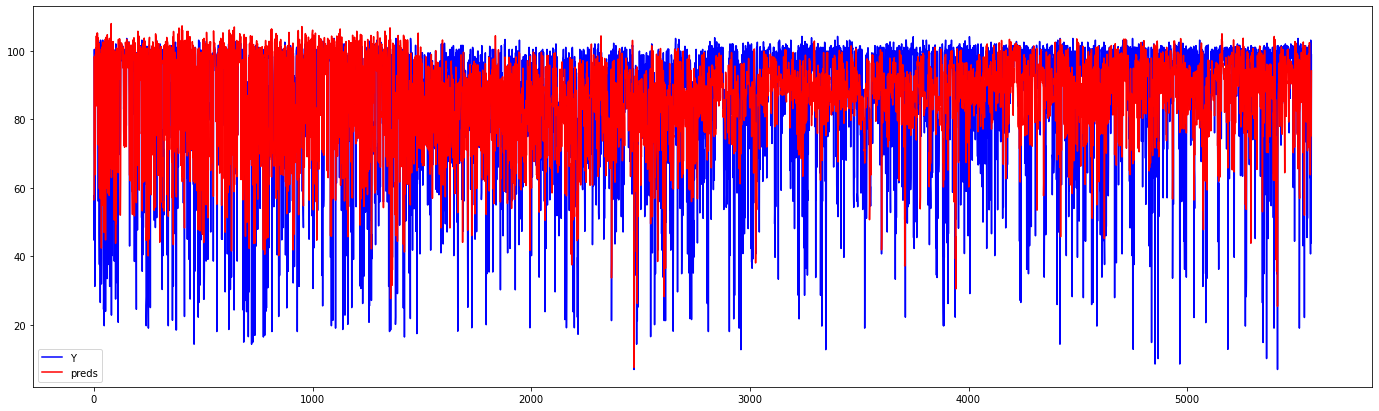

In [ ]:
# # 전체
# X = np.arange(len(tt))
# y1 = df2.loc['201390':, '탑승률']
# y2 = df2.loc['201390':, '예측값']

# plt.figure(figsize=(24,7))
# plt.plot(X, y1, 'b', label='Y')
# plt.plot(X, y2, 'r', label='preds')
# # plt.plot(X, y_test, 'r--', X, test_pred, 'bs')
# plt.legend()
# plt.show()

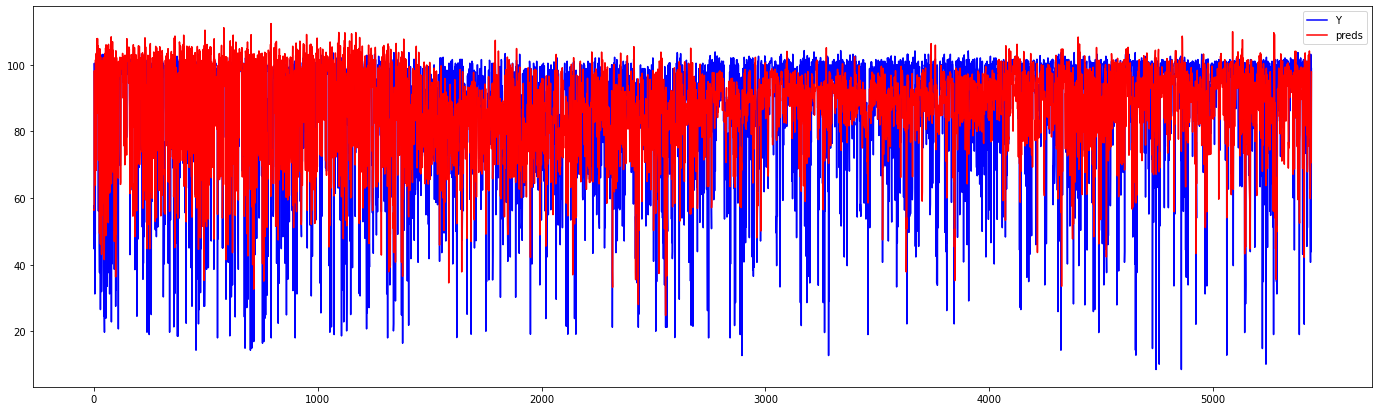

In [ ]:
# 국내만
X = np.arange(len(tt))
y1 = df2.loc['201390':, '탑승률']
y2 = df2.loc['201390':, '예측값']

plt.figure(figsize=(24,7))
plt.plot(X, y1, 'b', label='Y')
plt.plot(X, y2, 'r', label='preds')
# plt.plot(X, y_test, 'r--', X, test_pred, 'bs')
plt.legend()
plt.show()

In [ ]:
len(x_test.index)

51620

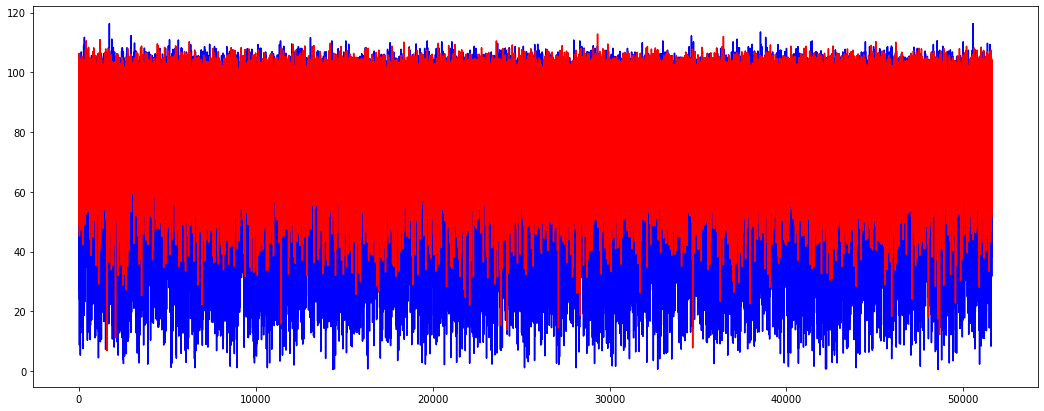

In [ ]:
# 좌석수만
X = np.arange(len(x_test.index))

plt.figure(figsize=(18,7))
plt.plot(X, y_test, 'b', label='Y')
plt.plot(X, test_pred, 'r', label='pred')
# plt.plot(X, y_test, 'r--', X, test_pred, 'bs')
plt.show()

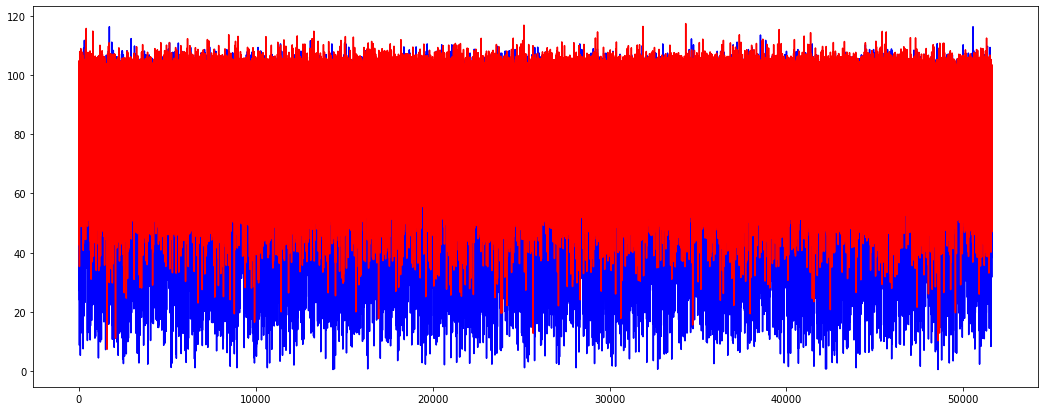

In [ ]:
# # 시즌ID 포함
# X = np.arange(len(x_test.index))

# plt.figure(figsize=(18,7))
# plt.plot(X, y_test, 'b', label='Y')
# plt.plot(X, test_pred, 'r', label='pred')
# # plt.plot(X, y_test, 'r--', X, test_pred, 'bs')
# plt.show()

In [ ]:
error = [x - y for x,y in zip(y_test, test_pred)]
error

[0.24388879279997866,
 -15.018272228220113,
 -5.217661311653828,
 -10.781147456546705,
 -0.5388835159683083,
 2.789864682677745,
 9.435264965647264,
 -37.724556659405934,
 -11.919058905795367,
 12.15862247109412,
 -6.019009262632949,
 -6.376017337843919,
 2.4407023690666136,
 9.166854001405696,
 -7.722971513304557,
 10.553186051489988,
 -33.29885949885332,
 20.265094295311897,
 7.2020822024962285,
 8.975487386551933,
 -0.548891215096944,
 -0.842118027014692,
 -7.596991192701225,
 -8.336587187559104,
 6.040128317591197,
 18.712762702884177,
 -12.332662509946118,
 -43.389434888968665,
 -1.1482408401928552,
 -3.3365242093507703,
 10.966077986499855,
 -0.7855504317521422,
 2.118961703554021,
 -26.60161100133936,
 -4.487124034965774,
 -1.3969982827842529,
 7.101949122497288,
 13.39165008417055,
 6.234747816581944,
 6.44888775889487,
 -5.320071986824061,
 9.291275605609755,
 -43.59187336038098,
 -3.632641030586882,
 -3.2155873079537827,
 -37.97119026698486,
 2.6517203110441017,
 8.3884542998

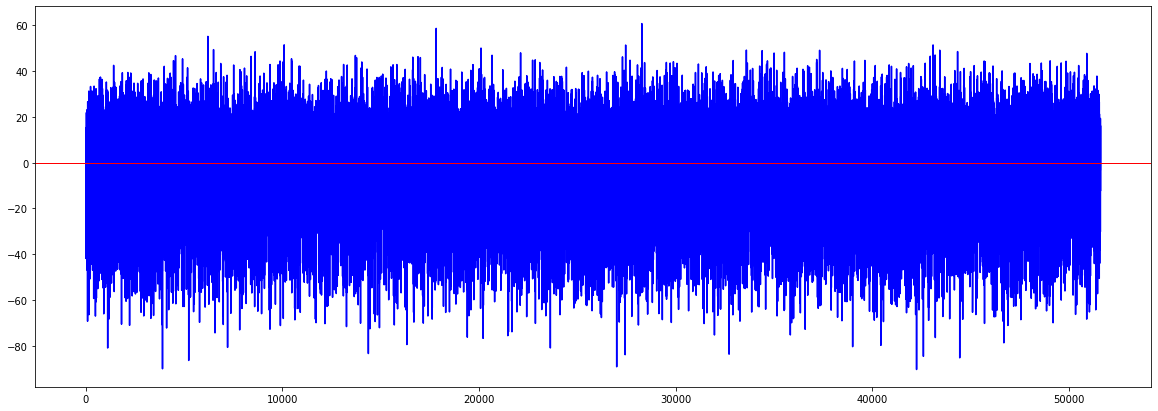

In [ ]:
# 좌석수만
X = np.arange(len(x_test.index))

plt.figure(figsize=(20,7))
plt.plot(X, error, 'b', label='Y - y_pred')
plt.axhline(y=0, color='r', linewidth=1)
plt.show()

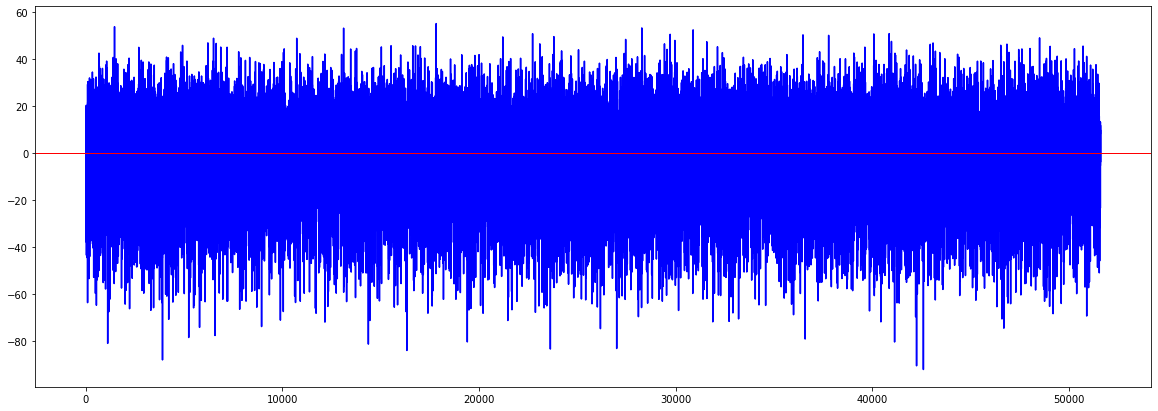

In [ ]:
# 시즌ID 포함
X = np.arange(len(x_test.index))

plt.figure(figsize=(20,7))
plt.plot(X, error, 'b', label='Y - y_pred')
plt.axhline(y=0, color='r', linewidth=1)
plt.show()

## catboost 예측
- 전처리.ipynb에서 '예측 데이터-전처리' 후 수행
- 최종예측결과_전체.csv

In [ ]:
# 전처리된 예측 데이터 로드
ex_df = pd.read_csv(path+'2023특송_(일자포함)2.csv', encoding='cp949', index_col=0)
ex_df['운항편명'] = encoder.transform(ex_df['운항편명'])    # 운항편명 인코딩
ex_df = ex_df.fillna(0)
ex_df.head()

,실제운항일자,출발도착구분코드,IATA공항코드,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,노선구분코드,n번째날,특송기간,특송종류,운항시,주야여부,평균탑승률,요일,주말,노선_시간별운항횟수,노선_일별운항횟수
0,2023-01-20,A,PUS,189,LJ,1659,CEB,I,1,5,SL,0시,야간,78.7,4,0,1,2
1,2023-01-21,A,PUS,189,LJ,1659,CEB,I,2,5,SL,0시,야간,78.7,5,1,1,2
2,2023-01-22,A,PUS,189,LJ,1659,CEB,I,3,5,SL,0시,야간,78.7,6,1,1,2
3,2023-01-23,A,PUS,189,LJ,1659,CEB,I,4,5,SL,0시,야간,78.7,0,0,1,2
4,2023-01-24,A,PUS,189,LJ,1659,CEB,I,5,5,SL,0시,야간,78.7,1,0,1,2


In [ ]:
# 필요 컬럼 추출
test_df = ex_df.loc[:, ['출발도착구분코드', 'IATA공항코드', '좌석수', 'IATA항공사코드', '운항편명', '상대IATA공항코드',
                        '노선구분코드', 'n번째날', '특송기간', '특송종류','운항시','주야여부','평균탑승률','요일','주말']]
test_df

,출발도착구분코드,IATA공항코드,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,노선구분코드,n번째날,특송기간,특송종류,운항시,주야여부,평균탑승률,요일,주말
0,A,PUS,189,LJ,1659,CEB,I,1,5,SL,0시,야간,78.7,4,0
1,A,PUS,189,LJ,1659,CEB,I,2,5,SL,0시,야간,78.7,5,1
2,A,PUS,189,LJ,1659,CEB,I,3,5,SL,0시,야간,78.7,6,1
3,A,PUS,189,LJ,1659,CEB,I,4,5,SL,0시,야간,78.7,0,0
4,A,PUS,189,LJ,1659,CEB,I,5,5,SL,0시,야간,78.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6608,A,CJJ,188,LJ,2048,CJU,D,1,5,SL,23시,야간,82.6,4,0
6609,A,CJJ,188,LJ,2048,CJU,D,2,5,SL,23시,야간,82.6,5,1
6610,A,CJJ,188,LJ,2048,CJU,D,3,5,SL,23시,야간,82.6,6,1
6611,A,CJJ,188,LJ,2048,CJU,D,4,5,SL,23시,야간,82.6,0,0


In [ ]:
# 저장해둔 모델 로드
test = CatBoostRegressor(cat_features = ['출발도착구분코드', 'IATA공항코드', 'IATA항공사코드','운항편명','상대IATA공항코드',
                                         '노선구분코드', 'n번째날', '특송종류', '운항시', '주야여부', '요일', '주말'])

test.load_model(path+'모델/cb_all_recent222.model')

In [ ]:
test_df['예측값'] = test.predict(test_df)   # 테스트 데이터 예측값
test_df['운항편명'] = encoder.inverse_transform(test_df['운항편명'])    # 운항편명 인코딩 전으로 복원
test_df['일자'] = ex_df['실제운항일자']
test_df.loc[test_df["예측값"] >= 100, "예측값"] = 99.9    # 예측값 100 이상이면 99.9로 변환

In [ ]:
test_df["예측값"].describe()

count    6613.000000
mean       86.652848
std        10.490912
min        28.196825
25%        80.536268
50%        88.219926
75%        94.953846
max        99.997865
Name: 예측값, dtype: float64

In [ ]:
test_df['예상승객수'] = round((test_df.좌석수 * test_df.예측값 / 100),0)     # 예상승객수 = (좌석수 * 예측값 / 100)
test_df['예상승객수'] = test_df.예상승객수.apply(lambda x: int(x))           # 형변환: float -> int
test_df['예측값'] = test_df.예측값.apply(lambda x: round(x,1))               # 소수 첫째자리까지만
test_df

,출발도착구분코드,IATA공항코드,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,노선구분코드,n번째날,특송기간,특송종류,운항시,주야여부,평균탑승률,요일,주말,예측값,일자,예상승객수
0,A,PUS,189,LJ,LJ038,CEB,I,1,5,SL,0시,야간,78.7,4,0,82.9,2023-01-20,157
1,A,PUS,189,LJ,LJ038,CEB,I,2,5,SL,0시,야간,78.7,5,1,83.2,2023-01-21,157
2,A,PUS,189,LJ,LJ038,CEB,I,3,5,SL,0시,야간,78.7,6,1,79.6,2023-01-22,150
3,A,PUS,189,LJ,LJ038,CEB,I,4,5,SL,0시,야간,78.7,0,0,91.7,2023-01-23,173
4,A,PUS,189,LJ,LJ038,CEB,I,5,5,SL,0시,야간,78.7,1,0,92.4,2023-01-24,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6608,A,CJJ,188,LJ,LJLJ582,CJU,D,1,5,SL,23시,야간,82.6,4,0,79.8,2023-01-20,150
6609,A,CJJ,188,LJ,LJLJ582,CJU,D,2,5,SL,23시,야간,82.6,5,1,82.2,2023-01-21,155
6610,A,CJJ,188,LJ,LJLJ582,CJU,D,3,5,SL,23시,야간,82.6,6,1,79.9,2023-01-22,150
6611,A,CJJ,188,LJ,LJLJ582,CJU,D,4,5,SL,23시,야간,82.6,0,0,89.3,2023-01-23,168


In [ ]:
# 결과값 저장
# test_df.to_csv(path+'최종예측결과_전체.csv', encoding='cp949')

## 집계
- 공항_시간별_승객예측값.xlsx

In [ ]:
final_res = pd.read_csv(path + "최종예측결과_전체.csv", encoding = "cp949", index_col = 0)
final_res

,출발도착구분코드,IATA공항코드,좌석수,IATA항공사코드,운항편명,상대IATA공항코드,노선구분코드,n번째날,특송기간,특송종류,운항시,주야여부,평균탑승률,요일,주말,예측값,일자,예상승객수
0,A,PUS,189,LJ,LJ038,CEB,I,1,5,SL,0시,야간,78.7,4,0,82.9,2023-01-20,157
1,A,PUS,189,LJ,LJ038,CEB,I,2,5,SL,0시,야간,78.7,5,1,83.2,2023-01-21,157
2,A,PUS,189,LJ,LJ038,CEB,I,3,5,SL,0시,야간,78.7,6,1,79.6,2023-01-22,150
3,A,PUS,189,LJ,LJ038,CEB,I,4,5,SL,0시,야간,78.7,0,0,91.7,2023-01-23,173
4,A,PUS,189,LJ,LJ038,CEB,I,5,5,SL,0시,야간,78.7,1,0,92.4,2023-01-24,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6608,A,CJJ,188,LJ,LJLJ582,CJU,D,1,5,SL,23시,야간,82.6,4,0,79.8,2023-01-20,150
6609,A,CJJ,188,LJ,LJLJ582,CJU,D,2,5,SL,23시,야간,82.6,5,1,82.2,2023-01-21,155
6610,A,CJJ,188,LJ,LJLJ582,CJU,D,3,5,SL,23시,야간,82.6,6,1,79.9,2023-01-22,150
6611,A,CJJ,188,LJ,LJLJ582,CJU,D,4,5,SL,23시,야간,82.6,0,0,89.3,2023-01-23,168


In [ ]:
# 출도착, 노선, 공항, 일자, 시간대별 집계
a = final_res.groupby(["출발도착구분코드",'노선구분코드', "IATA공항코드", "일자", "운항시"])["예상승객수"].sum().reset_index()
a

,출발도착구분코드,노선구분코드,IATA공항코드,일자,운항시,예상승객수
0,A,D,CJJ,2023-01-20,10시,477
1,A,D,CJJ,2023-01-20,12시,160
2,A,D,CJJ,2023-01-20,13시,168
3,A,D,CJJ,2023-01-20,14시,162
4,A,D,CJJ,2023-01-20,15시,272
...,...,...,...,...,...,...
1554,D,I,YNY,2023-01-23,19시,80
1555,D,I,YNY,2023-01-23,21시,73
1556,D,I,YNY,2023-01-23,8시,81
1557,D,I,YNY,2023-01-24,20시,128


In [ ]:
# a.IATA공항코드.unique()

array(['CJJ', 'CJU', 'GMP', 'HIN', 'KPO', 'KUV', 'KWJ', 'MWX', 'PUS',
       'RSU', 'TAE', 'USN', 'WJU', 'YNY'], dtype=object)

In [ ]:
a.to_excel(path + "공항_시간별_승객예측값.xlsx")   # 집계결과 저장